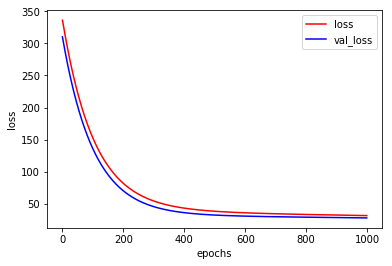

In [7]:
# write your code here
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

# 加载数据
data = load_svmlight_file(f=r"E:\machine learning\lab1\house")

# 将数据中的特征和标签分开
n_x = data[0]
n_y = data[1]

# 分割测试集，验证集
X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2)

# 初始化参数
w = np.random.normal(size=(13))
b = np.random.normal(size=(1))
y_ = np.zeros(1)
loss = np.zeros(1)
learning_rate = 0.001
epoch = 1000

# 记录loss随迭代次数的值
losses = []

# 记录验证集的loss随迭代次数的值
val_losses = []

# 验证
def validation(X_test, y_test, w, b):
    loss = 0
    for i in range(X_test.shape[0]):
        y_ = np.dot(X_test[i].data, w) + b
        loss += (y_test[i] - y_) * (y_test[i] - y_) * 0.5
    return loss/X_test.shape[0]
    
for num in range(epoch):
    # loss_function 对w，b的偏导
    G_w = 0
    G_b = 0
    
    # sigma求和
    for i in range(X_train.shape[0]):
        y_ = np.dot(X_train[i].data, w) + b
        loss += (y_train[i] - y_) * (y_train[i] - y_) * 0.5
        G_w += (y_train[i] - y_) * (-X_train[i].data)
        G_b += y_ - y_train[i]
        
    # loss_function，偏导的平均数
    loss /= X_train.shape[0]
    G_w /= X_train.shape[0]
    G_b /= X_train.shape[0]
    
    # 更新参数
    w = w - learning_rate * G_w
    b = b - learning_rate * G_b
    
    # print(loss[0])
    # 验证
    val_loss = validation(X_test, y_test, w, b)
    
    # 将loss加入列表
    losses.append(loss[0])
    val_losses.append(val_loss[0])
    
# loss随迭代次数的变化图
plt.plot(range(epoch), losses, label="loss", color='red')  
plt.plot(range(epoch), val_losses, label="val_loss", color='blue')  
plt.xlabel("epochs")  
plt.ylabel('loss')  
plt.legend()
plt.show()
